In [1]:
#import dependencies 
import os
import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.applications.vgg16 import (VGG16, preprocess_input, decode_predictions)
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
#load the VGG16 model without the top layer or output layer
trained_model = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3))

In [3]:
#print out all layers
for layer in trained_model.layers:
    print(layer)

In [4]:
#freeze all layers except last 4 layers and make them trainable
for layer in trained_model.layers[:-4]:
    layer.trainable = False

In [5]:
#check if the last 4 layers are trainable
for layer in trained_model.layers:
    print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x000002377FB1E0B8> False
<keras.layers.convolutional.Conv2D object at 0x000002377FB1E438> False
<keras.layers.convolutional.Conv2D object at 0x000002377FACE278> False
<keras.layers.pooling.MaxPooling2D object at 0x000002377F6FC0B8> False
<keras.layers.convolutional.Conv2D object at 0x000002377F707668> False
<keras.layers.convolutional.Conv2D object at 0x000002377FB44B38> False
<keras.layers.pooling.MaxPooling2D object at 0x000002377FB7BBE0> False
<keras.layers.convolutional.Conv2D object at 0x000002377FB8C9E8> False
<keras.layers.convolutional.Conv2D object at 0x000002377FB9FEF0> False
<keras.layers.convolutional.Conv2D object at 0x000002377FBB1FD0> False
<keras.layers.pooling.MaxPooling2D object at 0x000002377FBD8940> False
<keras.layers.convolutional.Conv2D object at 0x000002377FBE8B00> False
<keras.layers.convolutional.Conv2D object at 0x000002377FBFBD30> False
<keras.layers.convolutional.Conv2D object at 0x000002377FC0C5C0> False
<ker

In [6]:
#create my fine tuned model
my_model = models.Sequential()
#use VGG16 model as the base
my_model.add(trained_model)
my_model.add(layers.Flatten())
#add another layer with 'relu' activation
my_model.add(layers.Dense(256, activation='relu'))
#add drop out regularization to reduce overfit
my_model.add(layers.Dropout(0.5))
#add output layer with 'softmax' activation for 5 classes / flower names
my_model.add(layers.Dense(5, activation='softmax'))

In [7]:
#show model summary
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 21,138,757
Trainable params: 13,503,493
Non-trainable params: 7,635,264
_________________________________________________________________


In [8]:
#pre-process training data, use data augmentation to increase the amount of training data and reduce overfit
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
#pre-process validation data
validation_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
#specify training and validation batch size
training_batchsize = 50
validation_batchsize = 10

#specify training data and validation data path
training_path = "Data/ImageNet_images/training"
validation_path = "Data/ImageNet_images/validation"

#specify image size used in the model
image_size = (224,224)

In [10]:
#generate training data from pictures folder
train_generator = train_datagen.flow_from_directory(
        training_path,
        target_size=image_size,
        batch_size=training_batchsize,
        class_mode='categorical')
 
#generate validation data from pictures folder
validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size=image_size,
    batch_size=validation_batchsize,
    class_mode='categorical',
    shuffle=False)

Found 250 images belonging to 5 classes.
Found 250 images belonging to 5 classes.


In [11]:
#compile the model
my_model.compile(loss='categorical_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-5),
            metrics=['acc'])
#my_model.compile(loss='categorical_crossentropy',
 #            optimizer=optimizers.Adamax(lr=1e-5),
  #          metrics=['acc'])
#my_model.compile(loss='categorical_crossentropy',
 #             optimizer=optimizers.Nadam(lr=1e-5),
  #            metrics=['acc'])

#train the model
history = my_model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=2)
 
#save the model
my_model.save('my_model.h5')

Epoch 1/30
 - 318s - loss: 1.9249 - acc: 0.2040 - val_loss: 1.5412 - val_acc: 0.3120
Epoch 2/30
 - 319s - loss: 1.7143 - acc: 0.2720 - val_loss: 1.4545 - val_acc: 0.4560
Epoch 3/30
 - 317s - loss: 1.4905 - acc: 0.4000 - val_loss: 1.3719 - val_acc: 0.5120
Epoch 4/30
 - 314s - loss: 1.3232 - acc: 0.4600 - val_loss: 1.3170 - val_acc: 0.5040
Epoch 5/30
 - 286s - loss: 1.1865 - acc: 0.5440 - val_loss: 1.2365 - val_acc: 0.5600
Epoch 6/30
 - 284s - loss: 1.0437 - acc: 0.5960 - val_loss: 1.1534 - val_acc: 0.6080
Epoch 7/30
 - 284s - loss: 0.9822 - acc: 0.6280 - val_loss: 1.1066 - val_acc: 0.6160
Epoch 8/30
 - 286s - loss: 0.8426 - acc: 0.7080 - val_loss: 1.0789 - val_acc: 0.6000
Epoch 9/30
 - 280s - loss: 0.8531 - acc: 0.6720 - val_loss: 1.0319 - val_acc: 0.6440
Epoch 10/30
 - 288s - loss: 0.7157 - acc: 0.7720 - val_loss: 0.9501 - val_acc: 0.6840
Epoch 11/30
 - 293s - loss: 0.6651 - acc: 0.7560 - val_loss: 0.9268 - val_acc: 0.7000
Epoch 12/30
 - 294s - loss: 0.6703 - acc: 0.7440 - val_loss: 0.

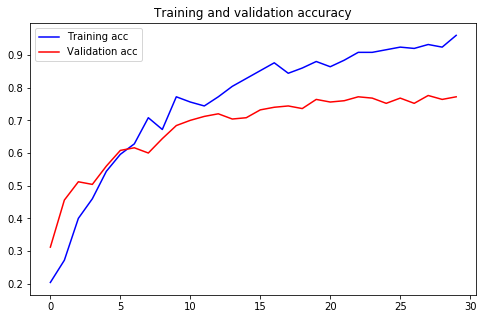

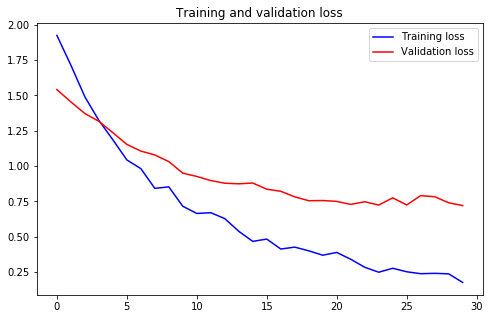

In [12]:
#plot training and validation accuracy, training and validation loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.figure(figsize=(8,5))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure(figsize=(8,5)) 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()